1. Desciptive stats inkl sentiment evt. - Ellen
> Avg. sentiment for hver udgiver, wordclouds, correlation heatmap for engagement metrics, plot timeseries (article count og eller engangement sum over tid). Plus andre gode idéer :).
2. sLDA - Julius
> Først normal LDA, vis topics og lav regression som baseline og så sLDA.
3. NN text - Jens
4. CNN billeder - Cille og Benji

# Project: Engagement prediction of news articles on Facebook

**42578 Advanced Business Analytics**

DTU, 1st of April 2022

_Name and study ID_: 

| Name | Study ID |
| --- | --- |
| Benjamin | s184314|
| Cecilie | s184304|
| Ellen | s184313|
| Jens | s183568 | 
| Julius | s184288 | 

## Description of chosen dataset
This dataset *Internet news data with readers engagement* is downloaded from Kaggle (link: https://www.kaggle.com/szymonjanowski/internet-articles-data-with-users-engagement). The dataset contains basic information about news articles: publisher, author, title and a short description together with engagement signals on Facebook (e.g. number of likes). Besides that, each article is provided with an URL to both the news article and associated photo, so it is possible to scrape extra information.   

The dataset consists of 10.437 rows and 14 columns. The data was collected between 03.09.2019 and 03.10.2019 (DD.MM.YYYY). 


## Research questions

This project will focus on how the engagement of new articles is impacted by the contents of the article such as the title, description and the image. To carry out the analysis several research questions have been created:

* Which attributes contribute most to the engagement?

* What metric best describes the value of engagement based on the given counts of shares, comments and reactions?

* What similarities can be found between the articles with a high engagement count?

* How can a supervised LDA model be used to predict engagement based on topics?

* Can the prediction be improved by using neural networks for modeling both the article content and image?


## Descriptive Stats

To begin with some descriptive statistics is carried out in order to understand and process the data for the following analysis. 

**Loading packages**

In [69]:
import pandas as pd
import matplotlib.pyplot
import matplotlib.dates
from datetime import datetime
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
from sklearn.feature_extraction import _stop_words
import string
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
Stop_Words= _stop_words.ENGLISH_STOP_WORDS
import textblob

In [70]:
# Import the following in order to access the .csv document in the folder
#from google.colab import drive
#drive.mount('/content/drive')

In [71]:
df = pd.read_csv("articles_data.csv", index_col=0)
df.head(5)

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count
0,reuters,Reuters,Reuters Editorial,NTSB says Autopilot engaged in 2018 California...,The National Transportation Safety Board said ...,https://www.reuters.com/article/us-tesla-crash...,https://s4.reutersmedia.net/resources/r/?m=02&...,2019-09-03T16:22:20Z,WASHINGTON (Reuters) - The National Transporta...,0.0,0.0,0.0,2528.0,0.0
1,the-irish-times,The Irish Times,Eoin Burke-Kennedy,Unemployment falls to post-crash low of 5.2%,Latest monthly figures reflect continued growt...,https://www.irishtimes.com/business/economy/un...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T10:32:28Z,The States jobless rate fell to 5.2 per cent l...,0.0,6.0,10.0,2.0,0.0
2,the-irish-times,The Irish Times,Deirdre McQuillan,"Louise Kennedy AW2019: Long coats, sparkling t...",Autumn-winter collection features designer’s g...,https://www.irishtimes.com/\t\t\t\t\t\t\t/life...,https://www.irishtimes.com/image-creator/?id=1...,2019-09-03T14:40:00Z,Louise Kennedy is showing off her autumn-winte...,1.0,NaN,NaN,NaN,NaN
3,al-jazeera-english,Al Jazeera English,Al Jazeera,North Korean footballer Han joins Italian gian...,Han is the first North Korean player in the Se...,https://www.aljazeera.com/news/2019/09/north-k...,https://www.aljazeera.com/mritems/Images/2019/...,2019-09-03T17:25:39Z,"Han Kwang Song, the first North Korean footbal...",0.0,0.0,0.0,7.0,0.0
4,bbc-news,BBC News,BBC News,UK government lawyer says proroguing parliamen...,"The UK government's lawyer, David Johnston arg...",https://www.bbc.co.uk/news/av/uk-scotland-4956...,https://ichef.bbci.co.uk/news/1024/branded_new...,2019-09-03T14:39:21Z,NaN,0.0,0.0,0.0,0.0,0.0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10437 entries, 0 to 10436
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   source_id                        10437 non-null  object 
 1   source_name                      10437 non-null  object 
 2   author                           9417 non-null   object 
 3   title                            10435 non-null  object 
 4   description                      10413 non-null  object 
 5   url                              10436 non-null  object 
 6   url_to_image                     9781 non-null   object 
 7   published_at                     10436 non-null  object 
 8   content                          9145 non-null   object 
 9   top_article                      10435 non-null  float64
 10  engagement_reaction_count        10319 non-null  float64
 11  engagement_comment_count         10319 non-null  float64
 12  engagement_share_c

In [73]:
print("The 'content' column has:", df.content.isna().sum(), "missing values")

The 'content' column has: 1292 missing values


In [74]:
print("The 'description' column has:", df.description.isna().sum(), "missing values")

The 'description' column has: 24 missing values


In [75]:
print("The 'title' column has:", df.title.isna().sum(), "missing values")

The 'title' column has: 2 missing values


We can see that the column `content` has 1292 missing values. We need to figure out what to do with these. Maybe we should just use the description column, which only has 24 of missing values

**Creating a new date column with yyyy-mm-dd** 

From the info of the dataset it can be seen that the `publised_at` attribute is defined as an object. This attribute is a date, thus it has to be transformed to date type. 

In [76]:
df['Date']= pd.to_datetime(df['published_at'])#.dt.date #remove the '.dt.date' if you want to keep the time of the day

In [77]:
# We can now look at what the timeframe of the data is
print("The earliest date is:", df["Date"].min())
print("The latest date is:", df["Date"].max())

The earliest date is: 2019-09-03 00:00:00+00:00
The latest date is: 2019-10-03 17:49:31+00:00


In the following we count observations per day:

In [78]:
df["Date"].dt.date.value_counts().tolist()

[843, 841, 817, 814, 807, 804, 772, 770, 759, 754, 639, 630, 596, 590]

In [79]:
df["Date"].dt.date.unique().tolist()

[datetime.date(2019, 9, 3),
 NaT,
 datetime.date(2019, 9, 5),
 datetime.date(2019, 9, 6),
 datetime.date(2019, 9, 7),
 datetime.date(2019, 9, 9),
 datetime.date(2019, 9, 10),
 datetime.date(2019, 9, 12),
 datetime.date(2019, 9, 14),
 datetime.date(2019, 9, 15),
 datetime.date(2019, 9, 19),
 datetime.date(2019, 9, 27),
 datetime.date(2019, 10, 1),
 datetime.date(2019, 10, 2),
 datetime.date(2019, 10, 3)]

There is row with missing date. We take a look at this row: 

In [80]:
df[df.Date.isnull()]

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count,Date
750,1,460.0,151.0,352.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [81]:
df[df.source_name == "460.0"]

,source_id,source_name,author,title,description,url,url_to_image,published_at,content,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count,Date
750,1,460.0,151.0,352.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


This row has a lot of missing values (NaN) and the `source_name`=460.0. This does not make a lot of sence, so the row is dropped. 

In [82]:
df = df.drop(df[df.source_name == "460.0"].index)

In [83]:
df.Date.dt.date.unique().tolist()

[datetime.date(2019, 9, 3),
 datetime.date(2019, 9, 5),
 datetime.date(2019, 9, 6),
 datetime.date(2019, 9, 7),
 datetime.date(2019, 9, 9),
 datetime.date(2019, 9, 10),
 datetime.date(2019, 9, 12),
 datetime.date(2019, 9, 14),
 datetime.date(2019, 9, 15),
 datetime.date(2019, 9, 19),
 datetime.date(2019, 9, 27),
 datetime.date(2019, 10, 1),
 datetime.date(2019, 10, 2),
 datetime.date(2019, 10, 3)]

##### Correlation

In [84]:
df_corr = df.drop(['Year'], axis = 1)

KeyError: "['Year'] not found in axis"

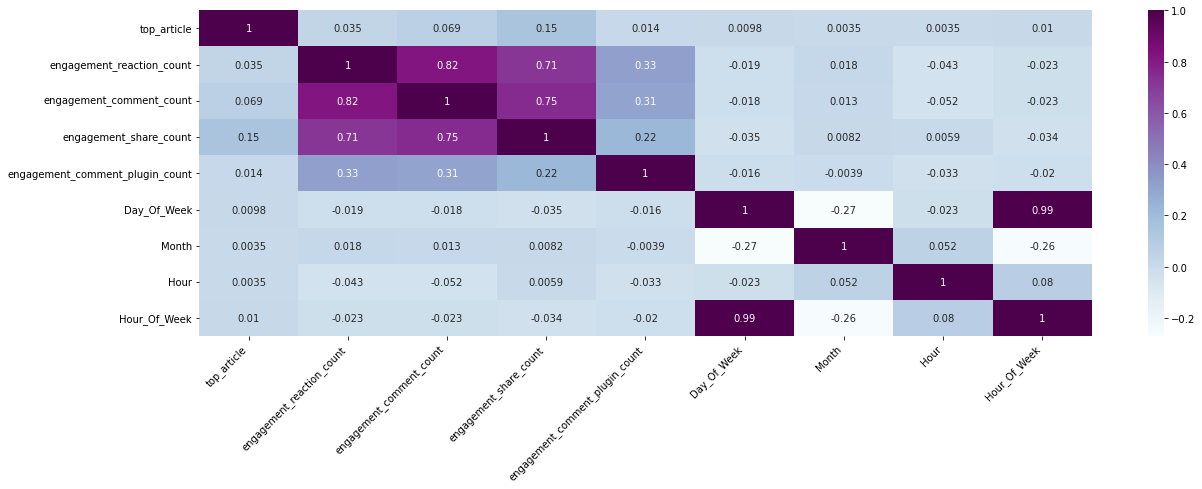

In [85]:
g = sns.heatmap(df_corr.corr(), cmap="BuPu", annot=True)
g.set_xticklabels(g.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.show()

In [86]:
fig = make_subplots(rows=1, cols=1)

fig.add_trace(
go.Scatter(x=df.Date.dt.date.unique().tolist(), y=df.Date.dt.date.value_counts()),
row=1, col=1)

fig.update_layout(height=600, width=900, title_text="Observations per day (year 2019)")
fig.show()

We will explore the distribution of weekdays. 

In [87]:
TimeOfDay=[]
for i in df.Date:
    TimeOfDay.append(i.strftime("%H"))

In [88]:
df['Day_Of_Week'] = df.Date.apply(lambda x: x.dayofweek)
df['Month'] = df.Date.apply(lambda x: x.month)
df['Year'] = df.Date.apply(lambda x: x.year)
df['Hour'] = df.Date.apply(lambda x: x.hour)
df['Hour_Of_Week'] = (df['Day_Of_Week'] - 1) * 24 + df['Hour']

In [89]:
day=df.groupby("Day_Of_Week")["source_id"].count().index
num_articles=df.groupby("Day_Of_Week")["source_id"].count()
fig = px.bar(x=day, y=num_articles, height=500, width=900)
fig.update_xaxes(title_text='DayOfWeek')
fig.update_yaxes(title_text='# articles')
fig.update_xaxes(type='category')

fig.show()

In [90]:
time_of_day=df.groupby("Hour")["source_id"].count().index
y=df.groupby("Hour").source_id.count().to_list()

fig = px.bar(x=time_of_day, y=y, height=500, width=900)
fig.update_xaxes(title_text='Time Of Day')
fig.update_yaxes(title_text='# Articles')
fig.update_xaxes(type='category')
fig.show()

We can take a look on the `engagement_reaction_count`, `engagement_comment_count` and `engagement_share_count`.

In [91]:
df.groupby(['Day_Of_Week']).engagement_reaction_count.mean()

Day_Of_Week
0    385.049206
1    598.035250
2    397.056356
3    277.135270
4    324.982569
5    339.302564
6    284.868379
Name: engagement_reaction_count, dtype: float64

In [92]:
#mean of engagement
reactionMean = df.groupby(['Day_Of_Week', 'top_article']).engagement_reaction_count.mean().reset_index()
commentMean = df.groupby(['Day_Of_Week', 'top_article']).engagement_comment_count.mean().reset_index()
shareMean = df.groupby(['Day_Of_Week', 'top_article']).engagement_share_count.mean().reset_index()

engagementMean = pd.DataFrame(data = reactionMean)

#rename column
engagementMean = engagementMean.rename(columns={'engagement_reaction_count': 'reaction_mean'})

engagementMean['comment_mean'] = commentMean['engagement_comment_count']
engagementMean['share_mean'] = shareMean['engagement_share_count']

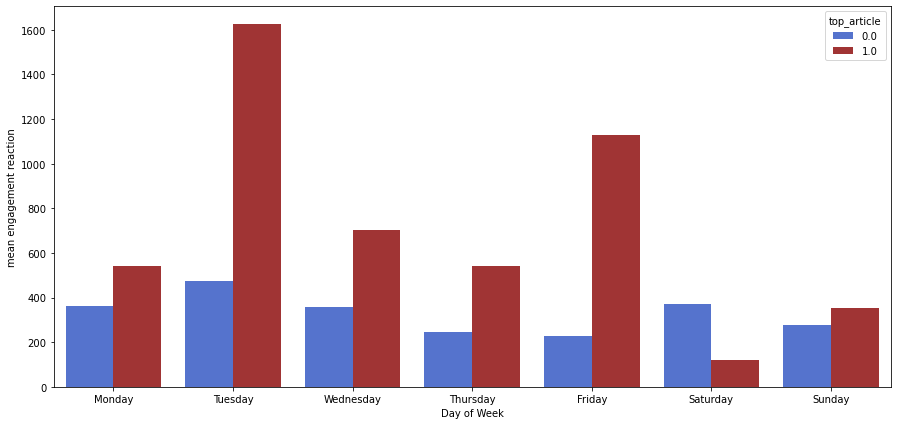

In [93]:
#reaction
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Day_Of_Week', y='reaction_mean', hue = 'top_article', data = engagementMean, palette = ['royalblue', 'firebrick'])
fig,ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig,ax.set(xlabel='Day of Week', ylabel='mean engagement reaction')
plt.show()

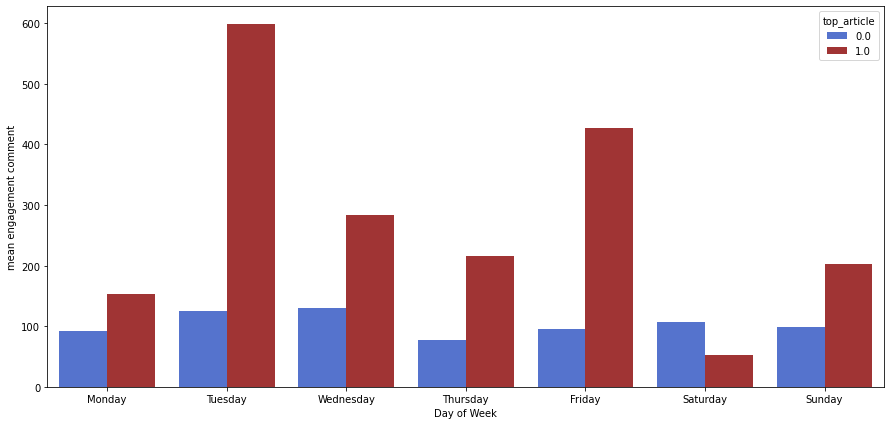

In [94]:
#comment
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Day_Of_Week', y='comment_mean', hue = 'top_article', data = engagementMean, palette = ['royalblue', 'firebrick'])
fig,ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig,ax.set(xlabel='Day of Week', ylabel='mean engagement comment')
plt.show()

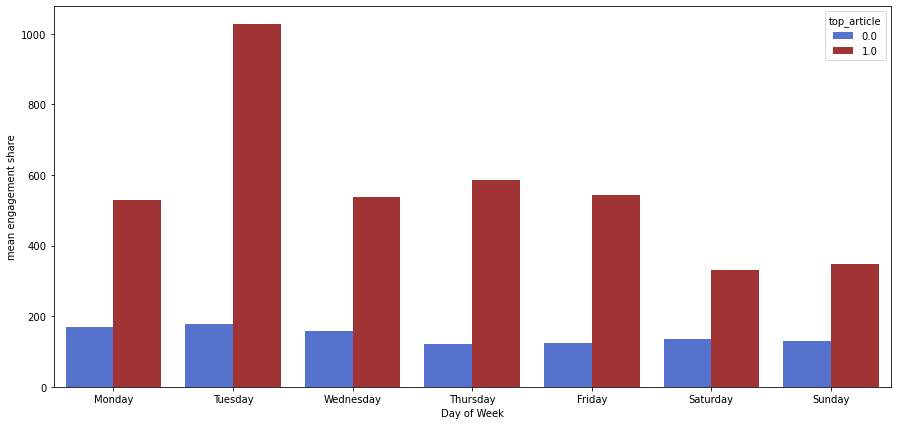

In [95]:
#share
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Day_Of_Week', y='share_mean', hue = 'top_article', data = engagementMean, palette = ['royalblue', 'firebrick'])
fig,ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
fig,ax.set(xlabel='Day of Week', ylabel='mean engagement share')
plt.show()

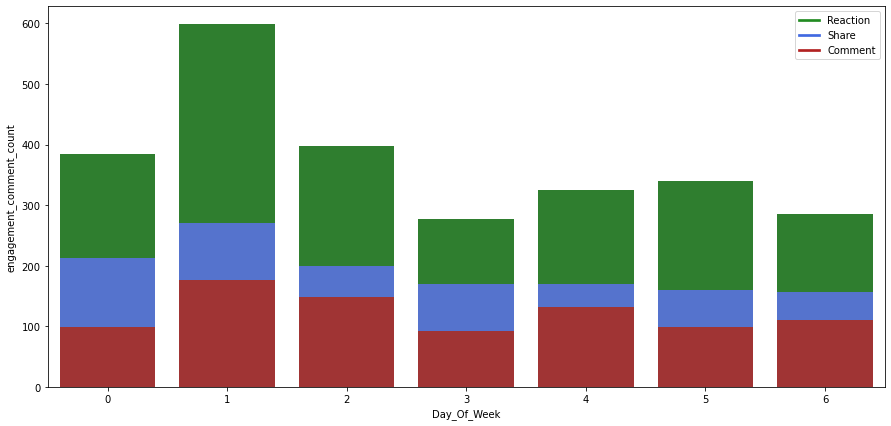

In [96]:
fig_dims = (15, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Day_Of_Week', y='engagement_reaction_count', data = df.groupby(['Day_Of_Week']).engagement_reaction_count.mean().reset_index(), ci = 0, color = 'forestgreen')
sns.barplot(x='Day_Of_Week', y='engagement_share_count', data = df.groupby(['Day_Of_Week']).engagement_share_count.mean().reset_index(), ci = 0, color = 'royalblue')
sns.barplot(x='Day_Of_Week', y='engagement_comment_count', data = df.groupby(['Day_Of_Week']).engagement_comment_count.mean().reset_index(), ci = 0, color = 'firebrick')

leg = plt.legend(labels=['Reaction','Share', 'Comment'])
leg.legendHandles[0].set_color('forestgreen')
leg.legendHandles[1].set_color('royalblue')
leg.legendHandles[2].set_color('firebrick')

plt.show()

Engagement count is compared for reaction, share and comment for each day of week

In [97]:
# This function is from the following website: https://www.kaggle.com/code/thomaskonstantin/exploring-and-modeling-internet-news-data/notebook

fig = make_subplots(rows=3, cols=1, subplot_titles=('Engagement Reaction Count','Engagement Comment Count','Engagement Share Count'))

b_date_mean = df.copy()
b_date_mean.published_at = pd.to_datetime(b_date_mean.published_at).dt.normalize()
b_date_mean = b_date_mean.groupby(by='published_at').mean().reset_index()

fig.add_trace(
go.Scatter(x=b_date_mean.published_at, y=b_date_mean.engagement_reaction_count,name='engagement_reaction_count'),
row=1, col=1)

fig.add_trace(
go.Scatter(x=b_date_mean.published_at, y=b_date_mean.engagement_comment_count,name='engagement_comment_count'),
row=2, col=1)

fig.add_trace(
go.Scatter(x=b_date_mean.published_at, y=b_date_mean.engagement_share_count,name='engagement_share_count'),
row=3, col=1)

fig.update_layout(height=600, width=900, title_text="Behavior Of Different Engagement Attributes Over Time")
fig.show()

**Looking at the occurences of each data source/news page**

In [98]:
fig = px.bar(x=df["source_name"].unique(), y = df['source_name'].value_counts(), height=500, width=900)
fig.update_xaxes(title_text='Source name')
fig.update_yaxes(title_text='#Observations')
fig.update_xaxes(type='category')
fig.show()

**We are investigating..**

In [99]:
df.content[0]

'WASHINGTON (Reuters) - The National Transportation Safety Board said Tuesday a Tesla Model S was in Autopilot mode when it struck a fire truck in Culver City, California one of a series of crashes the board is investigating involving Tesla’s driver assistance… [+478 chars]'

In the information about the dataset it says the following:   
- *Content column value indicates the unformatted content of the article. This field is truncated to 260 characters.*
 


**How many `top_article`=1 do we have?**

In [100]:
fig = px.pie(values=df.index.value_counts().values, names=df['top_article'])
fig.show()

Only 12.2% of the rows in the data represents a top article. 

Now let us investigate the different types of engament based on the day of the week the articles are published

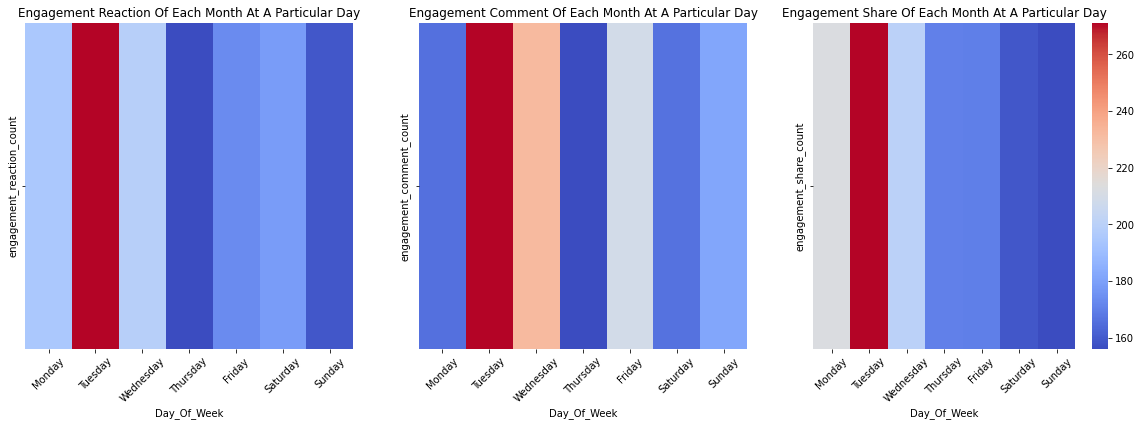

In [101]:
plt.rcParams["figure.figsize"]=[20,6]
plt.subplot(1,3,1)
plt.title('Engagement Reaction Of Each Month At A Particular Day')
ax1 = sns.heatmap(df.pivot_table(columns='Day_Of_Week',values='engagement_reaction_count'),cbar=False,cmap='coolwarm')
ax1.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation = 45)
#ax1.set(xlabel='Day of Week', ylabel='Engagement reaction count')
plt.subplot(1,3,2)
plt.title('Engagement Comment Of Each Month At A Particular Day')
ax2 = sns.heatmap(df.pivot_table(columns='Day_Of_Week',values='engagement_comment_count'),cbar=False,cmap='coolwarm')
ax2.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation = 45)
#ax2.set(xlabel='Day of Week', ylabel='Engagement reaction count')
plt.subplot(1,3,3)
plt.title('Engagement Share Of Each Month At A Particular Day')
ax3 = sns.heatmap(df.pivot_table(columns='Day_Of_Week',values='engagement_share_count'),cmap='coolwarm')
ax3.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], rotation = 45)
#ax3.set(xlabel='Day of Week', ylabel='Engagement reaction count')
plt.show()

### Text preprocessing
* Remove punctuations
* Remove stop words
* lower casing
* Lemmatization

In [102]:
def text_preprocessing(text):
    # remove punctuation 
    text = "".join([c for c in text 
                    if c not in string.punctuation])
    # lowercase
    text = "".join([c.lower() for c in text])
    
    # remove stopwords
    text = " ".join([w for w in text.split() 
                     if w not in Stop_Words])
    # lematizing
    text = " ".join([lemmatizer.lemmatize(w) for w in text.split()])
    return text

In [103]:
df['clean_description'] = df['description'].astype(str).apply(text_preprocessing)
df['clean_content'] = df['content'].astype(str).apply(text_preprocessing)

### Word clouds for article titles and descriptions.

In [104]:
from wordcloud import WordCloud,STOPWORDS
import re
import matplotlib.pyplot as plt

In [105]:
df.title = df.title.str.lower()
df = df[~df.title.isna()]
df.title = df.title.apply(lambda x: ' '.join(re.findall(r'\w+', x)) )
df.title = df.title.apply(lambda x:x.strip())

df.description = df.description.str.lower()
df = df[~df.description.isna()]
df.description = df.description.apply(lambda x: ' '.join(re.findall(r'\w+', x)) )
df.description = df.description.apply(lambda x:x.strip())

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



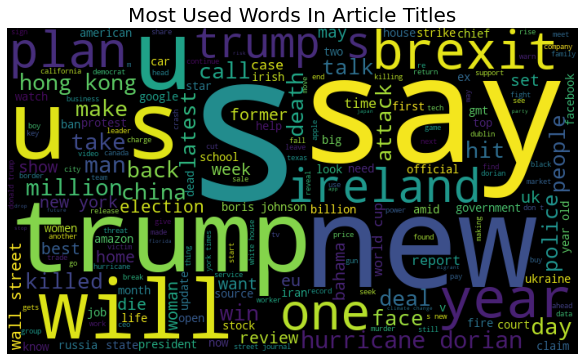

In [106]:
wc = WordCloud(width=700,height=400,stopwords=STOPWORDS).generate(' '.join(df.title))
plt.imshow(wc)
plt.axis('off')
plt.title("Most Used Words In Article Titles",fontsize=20)
plt.show()

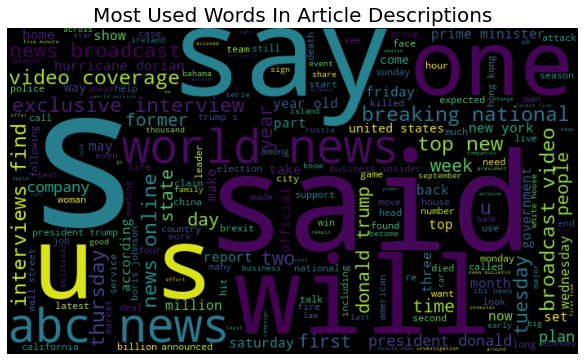

In [107]:
wc = WordCloud(width=700,height=400,stopwords=STOPWORDS).generate(' '.join(df.description))
plt.imshow(wc)
plt.axis('off')
plt.title("Most Used Words In Article Descriptions",fontsize=20)
plt.show()

In [108]:
#remove char and do stemming
wc = WordCloud(width=700,height=400,stopwords=STOPWORDS).generate(' '.join(df.content))
plt.imshow(wc)
plt.axis('off')
plt.title("Most Used Words In Article content",fontsize=20)
plt.show()

TypeError: sequence item 4: expected str instance, float found

### Sentiment Analysis

In [109]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [113]:
df['subjectivity_description'] = df['clean_description'].apply(getSubjectivity).apply(analysis)
df['polarity_description'] = df['clean_description'].apply(getPolarity).apply(analysis)
df['subjectivity_content'] = df['clean_content'].apply(getSubjectivity).apply(analysis)
df['polarity_content'] = df['clean_content'].apply(getPolarity).apply(analysis)

In [111]:
df['subjectivityScore_description'] = df['clean_description'].apply(getSubjectivity)
df['polarityScore_description'] = df['clean_description'].apply(getPolarity)
df['subjectivityScore_content'] = df['clean_content'].apply(getSubjectivity)
df['polarityScore_content'] = df['clean_content'].apply(getPolarity)

Mean of polarity and subjectivity for each source name

In [251]:
mean_sentiment = df.groupby('source_name').mean().reset_index()
mean_sentiment

,source_name,top_article,engagement_reaction_count,engagement_comment_count,engagement_share_count,engagement_comment_plugin_count,Day_Of_Week,Month,Year,Hour,Hour_Of_Week,subjectivityScore_description,polarityScore_description,subjectivityScore_content,polarityScore_content
0,ABC News,0.115891,301.825285,90.173837,72.574188,0.000878,2.867428,9.222125,2019.0,13.505707,58.323968,0.203888,0.015457,0.363652,0.046745
1,Al Jazeera English,0.074747,283.529293,92.909091,72.630303,0.018182,2.769697,9.246465,2019.0,10.224242,52.696970,0.241047,0.007506,0.303346,0.014852
2,BBC News,0.098229,439.127214,167.115942,161.542673,0.000000,2.927536,9.214976,2019.0,13.462963,59.723833,0.308188,0.064364,0.334004,0.063910
3,Business Insider,0.126908,206.626908,96.652672,297.402672,0.076336,2.814885,9.257634,2019.0,14.081107,57.638359,0.399363,0.062839,0.384004,0.060784
4,CBS News,0.146008,482.921218,179.579832,113.608193,0.000000,2.896008,9.239496,2019.0,11.279412,56.783613,0.328311,0.038203,0.171354,0.023930
5,CNN,0.099641,1093.118492,308.915619,293.616697,0.026930,2.806104,9.236984,2019.0,12.908438,56.254937,0.354627,0.064739,0.193719,0.022701
6,ESPN,1.000000,0.000000,0.000000,0.000000,0.000000,2.804878,9.243902,2019.0,11.756098,55.073171,0.326170,0.019474,0.366234,0.023641
7,Newsweek,0.066790,172.851577,60.159555,53.927644,0.000000,2.588126,9.037106,2019.0,10.730983,48.846011,0.290297,0.045668,0.387237,0.052376
8,Reuters,0.111022,13.548722,5.671725,516.849042,0.000000,2.923323,9.214856,2019.0,15.152556,61.312300,0.309944,0.033956,0.312206,0.037115
9,The Irish Times,0.104878,24.076302,9.437163,6.229803,0.000000,2.891870,9.217886,2019.0,11.963415,57.368293,0.271340,0.037680,0.358133,0.050581


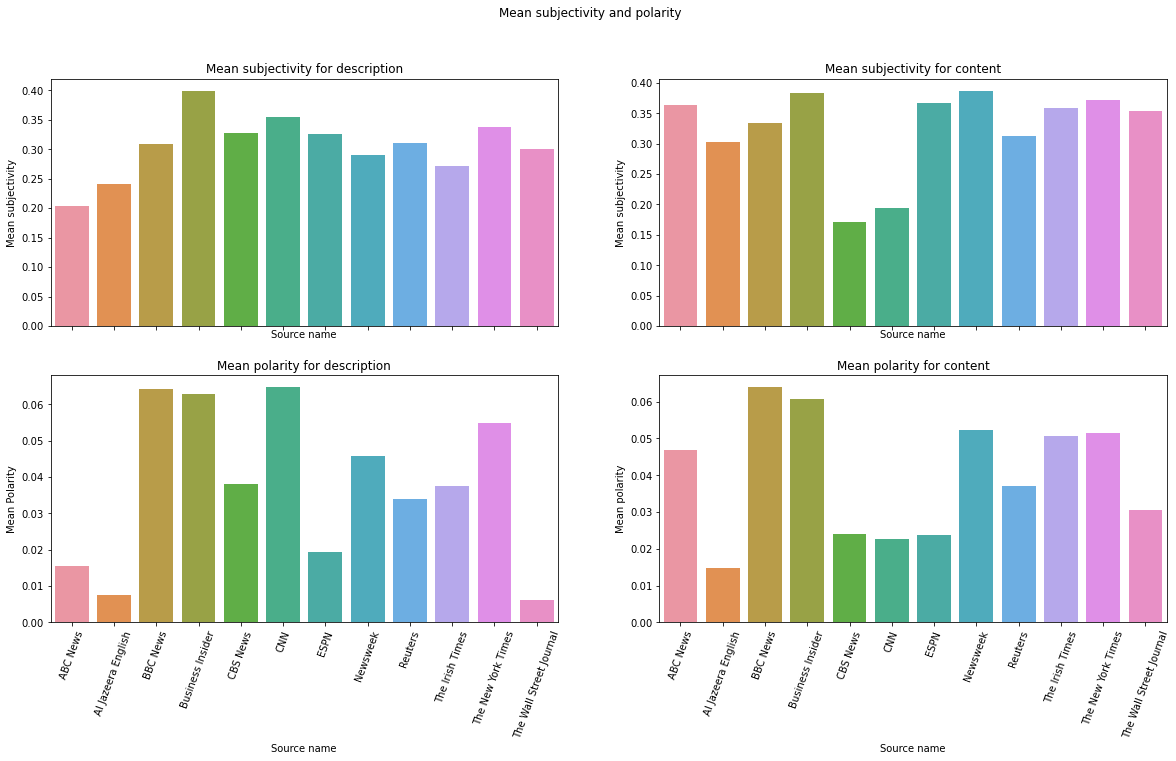

In [250]:
fig, ax = plt.subplots(2,2, sharex = True, figsize = (20,10))

#titles
fig.suptitle('Mean subjectivity and polarity')
ax[0,0].set_title('Mean subjectivity for description')
ax[1,0].set_title('Mean polarity for description')
ax[0,1].set_title('Mean subjectivity for content')
ax[1,1].set_title('Mean polarity for content')

#plot
ax1 = sns.barplot(ax=ax[0,0], x='source_name', y = 'subjectivityScore_description', data = mean_sentiment)
ax2 = sns.barplot(ax=ax[1,0], x='source_name', y = 'polarityScore_description', data = mean_sentiment)
ax3 = sns.barplot(ax=ax[0,1], x='source_name', y = 'subjectivityScore_content', data = mean_sentiment)
ax4 = sns.barplot(ax=ax[1,1], x='source_name', y = 'polarityScore_content', data = mean_sentiment)

#labels
ax1.set(xlabel='Source name', ylabel='Mean subjectivity')
ax2.set(xlabel='Source name', ylabel='Mean Polarity')
ax3.set(xlabel='Source name', ylabel='Mean subjectivity')
ax4.set(xlabel='Source name', ylabel='Mean polarity')

#xticks
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 70)
ax4.set_xticklabels(ax4.get_xticklabels(),rotation = 70)

plt.show()

In [89]:
#Number of articles with different subjectivity for description and content
len(df[df.subjectivity_description != df.subjectivity_content])

6728

In [91]:
#Number of articles with different polarity for description and content
len(df[df.polarity_description != df.polarity_content])

4971

# Supervised LDA fra stackoverflow

In [3]:
!pip install pymc

  Using cached pymc-2.3.8.tar.gz (385 kB)
  ERROR: Command errored out with exit status 1:
   command: /Users/juliusrasmussen/opt/anaconda3/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/99/scf2x63d4gsdly65b8zzk2vh0000gn/T/pip-install-h1y5cjdl/pymc_f71e120e78e2450cb2476c7572c0515f/setup.py'"'"'; __file__='"'"'/private/var/folders/99/scf2x63d4gsdly65b8zzk2vh0000gn/T/pip-install-h1y5cjdl/pymc_f71e120e78e2450cb2476c7572c0515f/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/99/scf2x63d4gsdly65b8zzk2vh0000gn/T/pip-wheel-nlusye3w
       cwd: /private/var/folders/99/scf2x63d4gsdly65b8zzk2vh0000gn/T/pip-install-h1y5cjdl/pymc_f71e120e78e2450cb2476c7572c0515f/
  Complete output (289 line

  CCompilerOpt.dist_test[581] : CCompilerOpt._dist_test_spawn[716] : Command (gcc -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -I/Users/juliusrasmussen/opt/anaconda3/include -arch x86_64 -I/Users/juliusrasmussen/opt/anaconda3/include -arch x86_64 -I/Users/juliusrasmussen/opt/anaconda3/include/python3.8 -c /Users/juliusrasmussen/opt/anaconda3/lib/python3.8/site-packages/numpy/distutils/checks/cpu_sse.c -o /var/folders/99/scf2x63d4gsdly65b8zzk2vh0000gn/T/tmpl9l1qmlm/Users/juliusrasmussen/opt/anaconda3/lib/python3.8/site-packages/numpy/distutils/checks/cpu_sse.o -MMD -MF /var/folders/99/scf2x63d4gsdly65b8zzk2vh0000gn/T/tmpl9l1qmlm/Users/juliusrasmussen/opt/anaconda3/lib/python3.8/site-packages/numpy/distutils/checks/cpu_sse.o.d) failed with exit status 1 output ->
  xcrun: error: invalid active developer path (/Library/Developer/CommandLineTools), missing xcrun at: /Library/Developer/CommandLineTools/usr/bin/xcrun
  
  CCompilerOpt

Failed to build pymc
    Running setup.py install for pymc ... error
    ERROR: Command errored out with exit status 1:
     command: /Users/juliusrasmussen/opt/anaconda3/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/99/scf2x63d4gsdly65b8zzk2vh0000gn/T/pip-install-h1y5cjdl/pymc_f71e120e78e2450cb2476c7572c0515f/setup.py'"'"'; __file__='"'"'/private/var/folders/99/scf2x63d4gsdly65b8zzk2vh0000gn/T/pip-install-h1y5cjdl/pymc_f71e120e78e2450cb2476c7572c0515f/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /private/var/folders/99/scf2x63d4gsdly65b8zzk2vh0000gn/T/pip-record-g6vbp0p2/install-record.txt --single-version-externally-managed --compile --install-headers /Users/juliusrasmussen/opt/anaconda3/in

In [2]:
import pymc as pm
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

train_corpus = ["exploitative and largely devoid of the depth or sophistication ",
                "simplistic silly and tedious",
                "it's so laddish and juvenile only teenage boys could possibly find it funny",
                "it shows that some studios firmly believe that people have lost the ability to think",
                "our culture is headed down the toilet with the ferocity of a frozen burrito",
                "offers that rare combination of entertainment and education",
                "the film provides some great insight",
                "this is a film well worth seeing",
                "a masterpiece four years in the making",
                "offers a breath of the fresh air of true sophistication"]
test_corpus =  ["this is a really positive review, great film"]
train_response = np.array([3, 1, 3, 2, 1, 5, 4, 4, 5, 5]) - 3

#LDA parameters
num_features = 1000  #vocabulary size
num_topics = 4       #fixed for LDA

tfidf = TfidfVectorizer(max_features = num_features, max_df=0.95, min_df=0, stop_words = 'english')

#generate tf-idf term-document matrix
A_tfidf_sp = tfidf.fit_transform(train_corpus)  #size D x V

print("number of docs: %d" %A_tfidf_sp.shape[0])
print("dictionary size: %d" %A_tfidf_sp.shape[1])

#tf-idf dictionary    
tfidf_dict = tfidf.get_feature_names()

K = num_topics # number of topics
V = A_tfidf_sp.shape[1] # number of words
D = A_tfidf_sp.shape[0] # number of documents

data = A_tfidf_sp.toarray()

#Supervised LDA Graphical Model
Wd = [len(doc) for doc in data]        
alpha = np.ones(K)
beta = np.ones(V)

theta = pm.Container([pm.CompletedDirichlet("theta_%s" % i, pm.Dirichlet("ptheta_%s" % i, theta=alpha)) for i in range(D)])
phi = pm.Container([pm.CompletedDirichlet("phi_%s" % k, pm.Dirichlet("pphi_%s" % k, theta=beta)) for k in range(K)])    

z = pm.Container([pm.Categorical('z_%s' % d, p = theta[d], size=Wd[d], value=np.random.randint(K, size=Wd[d])) for d in range(D)])

@pm.deterministic
def zbar(z=z):    
    zbar_list = []
    for i in range(len(z)):
        hist, bin_edges = np.histogram(z[i], bins=K)
        zbar_list.append(hist / float(np.sum(hist)))                
    return pm.Container(zbar_list)

eta = pm.Container([pm.Normal("eta_%s" % k, mu=0, tau=1.0/10**2) for k in range(K)])
y_tau = pm.Gamma("tau", alpha=0.1, beta=0.1)

@pm.deterministic
def y_mu(eta=eta, zbar=zbar):
    y_mu_list = []
    for i in range(len(zbar)):
        y_mu_list.append(np.dot(eta, zbar[i]))
    return pm.Container(y_mu_list)

#response likelihood
y = pm.Container([pm.Normal("y_%s" % d, mu=y_mu[d], tau=y_tau, value=train_response[d], observed=True) for d in range(D)])

# cannot use p=phi[z[d][i]] here since phi is an ordinary list while z[d][i] is stochastic
w = pm.Container([pm.Categorical("w_%i_%i" % (d,i), p = pm.Lambda('phi_z_%i_%i' % (d,i), lambda z=z[d][i], phi=phi: phi[z]),
                  value=data[d][i], observed=True) for d in range(D) for i in range(Wd[d])])

model = pm.Model([theta, phi, z, eta, y, w])
mcmc = pm.MCMC(model)
mcmc.sample(iter=1000, burn=100, thin=2)

#visualize topics    
phi0_samples = np.squeeze(mcmc.trace('phi_0')[:])
phi1_samples = np.squeeze(mcmc.trace('phi_1')[:])
phi2_samples = np.squeeze(mcmc.trace('phi_2')[:])
phi3_samples = np.squeeze(mcmc.trace('phi_3')[:])
ax = plt.subplot(221)
plt.bar(np.arange(V), phi0_samples[-1,:])
ax = plt.subplot(222)
plt.bar(np.arange(V), phi1_samples[-1,:])
ax = plt.subplot(223)
plt.bar(np.arange(V), phi2_samples[-1,:])
ax = plt.subplot(224)
plt.bar(np.arange(V), phi3_samples[-1,:])
plt.show()

ModuleNotFoundError: No module named 'pymc'